### Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

In [1]:
import datetime # для работы со временем 

import numpy as np # уже знакомые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data-2019.csv')
df

,Год/Месяц,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
0,1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
1,2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2,2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
3,2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
4,2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0
5,2004,"1,2,3,4,6*,7,10,11,17,18,24,25,31","1,7,8,14,15,21,22,23,28,29","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,115,2004,1803.2,1200.8
6,2005,"1,2,3,4,5,6,7,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,22*,23,26,27","5*,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,2,7,8,9,14,15,21,22,28,29","4,5,11,12,13,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29,30","3*,4,5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31",248,117,1981,1782.6,1187.4
7,2006,"1,2,3,4,5,6,7,8,9,14,15,21,22,28,29","4,5,11,12,18,19,22*,23,24,25","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,6*,7,8,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","3*,4,5,6,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31",248,117,1981,1782.6,1187.4
8,2007,"1,2,3,4,5,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,22*,23,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28*,29,30","1,5,6,8*,9,12,13,19,20,26,27","2,3,9*,10,11,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,5,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29*,30,31",249,116,1986,1786.8,1189.2
9,2008,"1,2,3,4,5,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,8*,9,10,11,17,18,24,25,31","1,8,11*,12,13,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23

In [3]:
hol = list()
vih = list()
pred = list()

In [4]:
for i in range(0,len(df.index)):
    for j in range(1,13):
        days=list(df.iloc[i][j].split(','))
        for d in days:
            if d.find('*')!=-1:
                d=d[:-1]
                dti=datetime.datetime(df.iloc[i][0], j, int(d))
                pred.append(dti)
            elif d.isdigit():
                dti=datetime.datetime(df.iloc[i][0], j, int(d))
                if dti.weekday()>4: vih.append(dti)
                else: hol.append(dti)    
pred1=pd.to_datetime(pred)
vih1=pd.to_datetime(vih)
hol1=pd.to_datetime(hol)
print(pred1) 
print(vih1)
print(hol1)
    

DatetimeIndex(['1999-01-06', '1999-04-30', '1999-06-11', '1999-12-31',
               '2000-01-06', '2000-03-07', '2000-05-08', '2000-12-11',
               '2001-03-07', '2001-04-30',
               ...
               '2024-04-30', '2024-05-08', '2024-06-11', '2024-12-31',
               '2025-03-07', '2025-04-30', '2025-05-08', '2025-06-11',
               '2025-11-03', '2025-12-31'],
              dtype='datetime64[ns]', length=133, freq=None)
DatetimeIndex(['1999-01-02', '1999-01-03', '1999-01-09', '1999-01-10',
               '1999-01-16', '1999-01-17', '1999-01-23', '1999-01-24',
               '1999-01-30', '1999-01-31',
               ...
               '2025-11-29', '2025-11-30', '2025-12-06', '2025-12-07',
               '2025-12-13', '2025-12-14', '2025-12-20', '2025-12-21',
               '2025-12-27', '2025-12-28'],
              dtype='datetime64[ns]', length=2788, freq=None)
DatetimeIndex(['1999-01-01', '1999-01-04', '1999-01-07', '1999-03-08',
               '1999-05-03

In [5]:
# кастомизация календаря

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, EasterMonday
from pandas.tseries.offsets import DateOffset, Day

In [6]:
class RussianBusinessCalendar_vihodnie(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2025, 12, 31)
    rules = [
             Holiday('Выходные', month=data.month, day=data.day, year=data.year) for data in vih1
             ]
    
russian_busday_vihodnie = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', 
                                              calendar=RussianBusinessCalendar_vihodnie())
calendar_vihodnie = RussianBusinessCalendar_vihodnie()
#calendar_RF_vihodnie.holidays()

In [7]:
class RussianBusinessCalendar_holidays(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2025, 12, 31)
    rules = [
             Holiday('Праздники', month=data.month, day=data.day, year=data.year) for data in hol1
             ]
    
russian_busday_holidays = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', 
                                              calendar=RussianBusinessCalendar_holidays())
calendar_holidays = RussianBusinessCalendar_holidays()
#calendar_RF_holidays.holidays()

In [8]:
class RussianBusinessCalendar_predholidays(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2025, 12, 31)
    rules = [
             Holiday('Предпраздники', month=data.month, day=data.day, year=data.year) for data in pred1
             ]
    
russian_busday_predholidays = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', 
                                              calendar=RussianBusinessCalendar_predholidays())
calendar_predholidays = RussianBusinessCalendar_predholidays()
#calendar_RF_holidays.holidays()

In [9]:
start_date = datetime.datetime(1999, 1, 1)
end_date = datetime.datetime(2025, 12, 31)

index = pd.date_range(start=start_date, end=end_date, freq='D') 
columns=['выходной','праздник','предпраздничный рабочий день','последний день месяца','последний рабочий день месяца','пн','вт','ср','чт','пт','сб','вс','январь','февраль','март', 'апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь','Предновогодний выходной день']
events = pd.DataFrame(index=index, columns=columns)
events = events.fillna(0)

In [10]:
day=pd.Series(data=['пн','вт','ср','чт','пт','сб','вс'],
                          index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
month=pd.Series(data=['январь','февраль','март', 'апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь'], 
                         index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


In [11]:

events.loc[events.index.isin(calendar_vihodnie.holidays(start_date, end_date)),'выходной']=1
events.loc[events.index.isin(calendar_holidays.holidays(start_date, end_date)),'праздник']=1
events.loc[events.index.isin(calendar_predholidays.holidays(start_date, end_date)),'предпраздничный рабочий день']=1

events.loc[events.index.is_month_end==True,'последний день месяца']=1

events.loc[(events['праздник']==0)&(events['выходной']==0)&(events['последний день месяца']==1),'последний рабочий день месяца']=1 
events.loc[events[(events['выходной']==1)&(events['последний день месяца']==1)].index-pd.offsets.BusinessDay(),'последний рабочий день месяца']=1 
events.loc[events[(events['праздник']==1)&(events['последний день месяца']==1)].index-pd.offsets.BusinessDay(),'последний рабочий день месяца']=1 

events.loc[(events['выходной']==1)&(events.index.month==12)&(events.index.day==31),'Предновогодний выходной день']=1

for i_day in day.index:
  events.loc[events.index.day_name()==i_day, day[i_day]]=1
for i_month in month.index:
  events.loc[events.index.month_name()==i_month, month[i_month]]=1



In [12]:
events

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,...,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
1999-01-01,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-01-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-03,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-04,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-05,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-29,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-30,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [13]:
ac = pd.read_csv('sber_stocks.csv',usecols=['TRADEDATE', 'CLOSE'])
ac.index=ac['TRADEDATE'].values
ac.drop('TRADEDATE', axis=1, inplace=True)
ac

,CLOSE
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76
...,...
2020-01-03,255.00
2020-01-06,253.90
2020-01-08,259.15
2020-01-09,257.99


In [14]:
ac = ac.join(events, how='left')
ac

,CLOSE,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,...,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
2013-03-25,98.79,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-26,97.20,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-27,96.75,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-28,98.59,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-03-29,98.76,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,255.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-06,253.90,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-08,259.15,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-09,257.99,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Лаговые переменные рабочих дней с глубинами: 1, 3, 5
ac.loc[:, 'Price(-1)'] = ac['CLOSE'].shift(1)
ac.loc[:, 'Price(-3)'] = ac['CLOSE'].shift(3)
ac.loc[:, 'Price(-5)'] = ac['CLOSE'].shift(5)
ac



,CLOSE,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,...,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день,Price(-1),Price(-3),Price(-5)
2013-03-25,98.79,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2013-03-26,97.20,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,98.79,NaN,NaN
2013-03-27,96.75,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,97.20,NaN,NaN
2013-03-28,98.59,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,96.75,98.79,NaN
2013-03-29,98.76,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,98.59,97.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,255.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,254.75,248.24,248.67
2020-01-06,253.90,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,255.00,252.06,248.04
2020-01-08,259.15,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,253.90,254.75,248.24
2020-01-09,257.99,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,259.15,255.00,252.06


In [16]:
#Скользящие статистики ['mean', 'median', 'max', 'min', 'std'] с окнами 1, 3, 5 сгрупированные по дням недели


In [17]:
ac.groupby(ac.index.day_name()).rolling(window=1)['CLOSE', 'Price(-1)', 'Price(-3)', 'Price(-5)'].agg([np.mean, np.median, np.max, np.min, np.std])


CLOSE                                                  \
                        mean                                median             
                       CLOSE Price(-1) Price(-3) Price(-5)   CLOSE Price(-1)   
Friday    2013-03-29   98.76     98.59     97.20       NaN   98.76     98.59   
          2013-04-05   99.38     99.91     98.93     98.76   99.38     99.91   
          2013-04-12   98.34    100.31    102.53     99.38   98.34    100.31   
          2013-04-19   96.22     95.35     95.92     98.34   96.22     95.35   
          2013-04-26   95.60     96.11     96.46     96.22   95.60     96.11   
...                      ...       ...       ...       ...     ...       ...   
Wednesday 2019-12-04  231.59    230.66    233.98    234.22  231.59    230.66   
          2019-12-11  240.32    237.91    235.14    231.59  240.32    237.91   
          2019-12-18  246.20    241.60    241.21    240.32  246.20    241.60   
          2019-12-25  248.04    248.67    244.71    246.20  248.04    248.67   
          2020-01-08  259.15    253.90    254.75    248.24  259.15    253.90   

                                                            ... Price(-5)  \
                                            amax            ...      amax   
                     Price(-3) Price(-5)   CLOSE Price(-1)  ... Price(-3)   
Friday    2013-03-29     97.20       NaN   98.76     98.59  ...     97.20   
          2013-04-05     98.93     98.76   99.38     99.91  ...     98.93   
          2013-04-12    102.53     99.38   98.34    100.31  ...    102.53   
          2013-04-19     95.92     98.34   96.22     95.35  ...     95.92   
          2013-04-26     96.46     96.22   95.60     96.11  ...     96.46   
...                        ...       ...     ...       ...  ...       ...   
Wednesday 2019-12-04    233.98    234.22  231.59    230.66  ...    233.98   
          2019-12-11    235.14    231.59  240.32    237.91  ...    235.14   
          2019-12-18    241.21    240.32  246.20    241.60  ...    241.21   
          2019-12-25    244.71    246.20  248.04    248.67  ...    244.71   
          2020-01-08    254.75    248.24  259.15    253.90  ...    254.75   

                                                                            \
                                  amin                                 std   
                     Price(-5)   CLOSE Price(-1) Price(-3) Price(-5) CLOSE   
Friday    2013-03-29       NaN   98.76     98.59     97.20       NaN   NaN   
          2013-04-05     98.76   99.38     99.91     98.93     98.76   NaN   
          2013-04-12     99.38   98.34    100.31    102.53     99.38   NaN   
          2013-04-19     98.34   96.22     95.35     95.92     98.34   NaN   
          2013-04-26     96.22   95.60     96.11     96.46     96.22   NaN   
...                        ...     ...       ...       ...       ...   ...   
Wednesday 2019-12-04    234.22  231.59    230.66    233.98    234.22   NaN   
          2019-12-11    231.59  240.32    237.91    235.14    231.59   NaN   
          2019-12-18    240.32  246.20    241.60    241.21    240.32   NaN   
          2019-12-25    246.20  248.04    248.67    244.71    246.20   NaN   
          2020-01-08    248.24  259.15    253.90    254.75    248.24   NaN   

                                                    
                                                    
                     Price(-1) Price(-3) Price(-5)  
Friday    2013-03-29       NaN       NaN       NaN  
          2013-04-05       NaN       NaN       NaN  
          2013-04-12       NaN       NaN       NaN  
          2013-04-19       NaN       NaN       NaN  
          2013-04-26       NaN       NaN       NaN  
...                        ...       ...       ...  
Wednesday 2019-12-04       NaN       NaN       NaN  
          2019-12-11       NaN       NaN       NaN  
          2019-12-18       NaN       NaN       NaN  
          2019-12-25       NaN       NaN       NaN  
          2020-01-08       NaN       NaN 

In [18]:
ac.groupby(ac.index.day_name()).rolling(window=3)['CLOSE', 'Price(-1)', 'Price(-3)', 'Price(-5)'].agg([np.mean, np.median, np.max, np.min, np.std])


CLOSE                                              \
                            mean                                      median   
                           CLOSE   Price(-1)   Price(-3)   Price(-5)   CLOSE   
Friday    2013-03-29         NaN         NaN         NaN         NaN     NaN   
          2013-04-05         NaN         NaN         NaN         NaN     NaN   
          2013-04-12   98.826667   99.603333   99.553333         NaN   98.76   
          2013-04-19   97.980000   98.523333   99.126667   98.826667   98.34   
          2013-04-26   96.720000   97.256667   98.303333   97.980000   96.22   
...                          ...         ...         ...         ...     ...   
Wednesday 2019-12-04  234.530000  234.970000  237.370000  236.403333  234.22   
          2019-12-11  235.376667  234.523333  235.750000  234.530000  234.22   
          2019-12-18  239.370000  236.723333  236.776667  235.376667  240.32   
          2019-12-25  244.853333  242.726667  240.353333  239.370000  246.20   
          2020-01-08  251.130000  248.056667  246.890000  244.920000  248.04   

                                                                      ...  \
                                                      amax            ...   
                     Price(-1) Price(-3) Price(-5)   CLOSE Price(-1)  ...   
Friday    2013-03-29       NaN       NaN       NaN     NaN       NaN  ...   
          2013-04-05       NaN       NaN       NaN     NaN       NaN  ...   
          2013-04-12     99.91     98.93       NaN   99.38    100.31  ...   
          2013-04-19     99.91     98.93     98.76   99.38    100.31  ...   
          2013-04-26     96.11     96.46     98.34   98.34    100.31  ...   
...                        ...       ...       ...     ...       ...  ...   
Wednesday 2019-12-04    235.00    238.13    237.21  237.78    239.25  ...   
          2019-12-11    235.00    235.14    234.22  240.32    237.91  ...   
          2019-12-18    237.91    235.14    234.22  246.20    241.60  ...   
          2019-12-25    241.60    241.21    240.32  248.04    248.67  ...   
          2020-01-08    248.67    244.71    246.20  259.15    253.90  ...   

                     Price(-5)                                        \
                          amax              amin                       
                     Price(-3) Price(-5)   CLOSE Price(-1) Price(-3)   
Friday    2013-03-29       NaN       NaN     NaN       NaN       NaN   
          2013-04-05       NaN       NaN     NaN       NaN       NaN   
          2013-04-12    102.53       NaN   98.34     98.59     97.20   
          2013-04-19    102.53     99.38   96.22     95.35     95.92   
          2013-04-26    102.53     99.38   95.60     95.35     95.92   
...                        ...       ...     ...       ...       ...   
Wednesday 2019-12-04    240.00    237.78  231.59    230.66    233.98   
          2019-12-11    238.13    237.78  231.59    230.66    233.98   
          2019-12-18    241.21    240.32  231.59    230.66    233.98   
          2019-12-25    244.71    246.20  240.32    237.91    235.14   
          2020-01-08    254.75    248.24  246.20    241.60    241.21   

                                                                        
                                     std                                
                     Price(-5)     CLOSE Price(-1) Price(-3) Price(-5)  
Friday    2013-03-29       NaN       NaN       NaN       NaN       NaN  
          2013-04-05       NaN       NaN       NaN       NaN       NaN  
          2013-04-12       NaN  0.523195  0.900074  2.719124       NaN  
          2013-04-19     98.34  1.610466  2.755455  3.309386  0.523195  
          2013-04-26     96.22  1.436802  2.671429  3.670345  1.610466  
...                        ...       ...       ...       ...       ...  
Wednesday 2019-12-04    234.22  3.106622  4.295079  3.081120  1.912180  
          2019-12-11    231.59  4.478463  3.648429  2.141191  3.106622  
          2019-

In [19]:
ac.groupby(ac.index.day_name()).rolling(window=5)['CLOSE', 'Price(-1)', 'Price(-3)', 'Price(-5)'].agg([np.mean, np.median, np.max, np.min, np.std])


CLOSE                                                  \
                         mean                                median             
                        CLOSE Price(-1) Price(-3) Price(-5)   CLOSE Price(-1)   
Friday    2013-03-29      NaN       NaN       NaN       NaN     NaN       NaN   
          2013-04-05      NaN       NaN       NaN       NaN     NaN       NaN   
          2013-04-12      NaN       NaN       NaN       NaN     NaN       NaN   
          2013-04-19      NaN       NaN       NaN       NaN     NaN       NaN   
          2013-04-26   97.660    98.054    98.208       NaN   98.34     98.59   
...                       ...       ...       ...       ...     ...       ...   
Wednesday 2019-12-04  235.964   236.662   237.434   237.668  237.21    238.53   
          2019-12-11  236.224   236.538   237.484   235.964  237.21    237.91   
          2019-12-18  238.022   236.884   237.692   236.224  237.78    237.91   
          2019-12-25  240.074   238.768   238.634   238.022  240.32    237.91   
          2020-01-08  245.060   242.548   241.958   240.114  246.20    241.60   

                                                            ... Price(-5)  \
                                            amax            ...      amax   
                     Price(-3) Price(-5)   CLOSE Price(-1)  ... Price(-3)   
Friday    2013-03-29       NaN       NaN     NaN       NaN  ...       NaN   
          2013-04-05       NaN       NaN     NaN       NaN  ...       NaN   
          2013-04-12       NaN       NaN     NaN       NaN  ...       NaN   
          2013-04-19       NaN       NaN     NaN       NaN  ...       NaN   
          2013-04-26     97.20       NaN   99.38    100.31  ...    102.53   
...                        ...       ...     ...       ...  ...       ...   
Wednesday 2019-12-04    238.13    237.78  239.02    239.87  ...    240.17   
          2019-12-11    238.13    237.21  240.32    239.87  ...    240.17   
          2019-12-18    238.13    237.21  246.20    241.60  ...    241.21   
          2019-12-25    238.13    237.78  248.04    248.67  ...    244.71   
          2020-01-08    241.21    240.32  259.15    253.90  ...    254.75   

                                                                      \
                                  amin                                 
                     Price(-5)   CLOSE Price(-1) Price(-3) Price(-5)   
Friday    2013-03-29       NaN     NaN       NaN       NaN       NaN   
          2013-04-05       NaN     NaN       NaN       NaN       NaN   
          2013-04-12       NaN     NaN       NaN       NaN       NaN   
          2013-04-19       NaN     NaN       NaN       NaN       NaN   
          2013-04-26       NaN   95.60     95.35     95.92       NaN   
...                        ...     ...       ...       ...       ...   
Wednesday 2019-12-04    240.11  231.59    230.66    233.98    234.22   
          2019-12-11    239.02  231.59    230.66    233.98    231.59   
          2019-12-18    240.32  231.59    230.66    233.98    231.59   
          2019-12-25    246.20  231.59    230.66    233.98    231.59   
          2020-01-08    248.24  231.59    230.66    233.98    231.59   

                                                               
                            std                                
                          CLOSE Price(-1) Price(-3) Price(-5)  
Friday    2013-03-29        NaN       NaN       NaN       NaN  
          2013-04-05        NaN       NaN       NaN       NaN  
          2013-04-12        NaN       NaN       NaN       NaN  
          2013-04-19        NaN       NaN       NaN       NaN  
          2013-04-26   1.654388  2.231161  2.669620       NaN  
...                         ...       ...       ...       ...  
Wednesday 2019-12-04   3.015084  3.849178  2.870388  2.230599  
          2019-12-11   3.378628  3.783381  2.816670  3.015084  
          2019-12-18   5.657846  4.218380  3.089769  3.378628  
          2019-12-25   7.198839  

In [20]:
#Статистики ['mean', 'median', 'max', 'min', 'std'] в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [21]:
ac.groupby(['праздник']).expanding(min_periods=1)['CLOSE', 'Price(-1)', 'Price(-3)', 'Price(-5)'].agg([np.mean, np.median, np.max, np.min, np.std])


CLOSE                                               \
                           mean                                       median   
                          CLOSE   Price(-1)   Price(-3)   Price(-5)    CLOSE   
праздник                                                                       
0        2013-03-25   98.790000         NaN         NaN         NaN   98.790   
         2013-03-26   97.995000   98.790000         NaN         NaN   97.995   
         2013-03-27   97.580000   97.995000         NaN         NaN   97.200   
         2013-03-28   97.832500   97.580000   98.790000         NaN   97.895   
         2013-03-29   98.018000   97.832500   97.995000         NaN   98.590   
...                         ...         ...         ...         ...      ...   
1        2019-05-03  149.948182  149.076061  147.338788  147.023030  165.510   
         2019-05-10  152.214412  151.456176  149.852353  149.437059  168.100   
         2020-01-03  155.151143  154.407429  152.663429  152.272286  170.690   
         2020-01-06  157.894167  157.201667  155.424444  154.932500  171.295   
         2020-01-08  160.630811  159.815135  158.108919  157.454324  171.900   

                                                                     ...  \
                                                     amax            ...   
                    Price(-1) Price(-3) Price(-5)   CLOSE Price(-1)  ...   
праздник                                                             ...   
0        2013-03-25       NaN       NaN       NaN   98.79       NaN  ...   
         2013-03-26    98.790       NaN       NaN   98.79     98.79  ...   
         2013-03-27    97.995       NaN       NaN   98.79     98.79  ...   
         2013-03-28    97.200    98.790       NaN   98.79     98.79  ...   
         2013-03-29    97.895    97.995       NaN   98.79     98.79  ...   
...                       ...       ...       ...     ...       ...  ...   
1        2019-05-03   165.900   165.440   166.490  274.60    274.00  ...   
         2019-05-10   168.900   167.770   168.295  274.60    274.00  ...   
         2020-01-03   171.900   170.100   170.100  274.60    274.00  ...   
         2020-01-06   172.575   170.700   170.700  274.60    274.00  ...   
         2020-01-08   173.250   171.300   171.300  274.60    274.00  ...   

                    Price(-5)                                                 \
                         amax             amin                                 
                    Price(-3) Price(-5)  CLOSE Price(-1) Price(-3) Price(-5)   
праздник                                                                       
0        2013-03-25       NaN       NaN  98.79       NaN       NaN       NaN   
         2013-03-26       NaN       NaN  97.20     98.79       NaN       NaN   
         2013-03-27       NaN       NaN  96.75     97.20       NaN       NaN   
         2013-03-28     98.79       NaN  96.75     96.75     98.79       NaN   
         2013-03-29     98.79       NaN  96.75     96.75     97.20       NaN   
...                       ...       ...    ...       ...       ...       ...   
1        2019-05-03    277.00     275.0  56.37     54.90     54.51     54.51   
         2019-05-10    277.00     275.0  56.37     54.90     54.51     54.51   
         2020-01-03    277.00     275.0  56.37     54.90     54.51     54.51   
         2020-01-06    277.00     275.0  56.37     54.90     54.51     54.51   
         2020-01-08    277.00     275.0  56.37     54.90     54.51     54.51   

                                                                 
                           std                                   
                         CLOSE  Price(-1)  Price(-3)  Price(-5)  
праздник                                                         
0        2013-03-25        NaN        NaN        NaN        NaN  
         2013-03-26   1.124300        NaN        NaN        NaN  
         2013-03-27   1.071774   1.124300        NaN        NaN  
         2013-03-28  

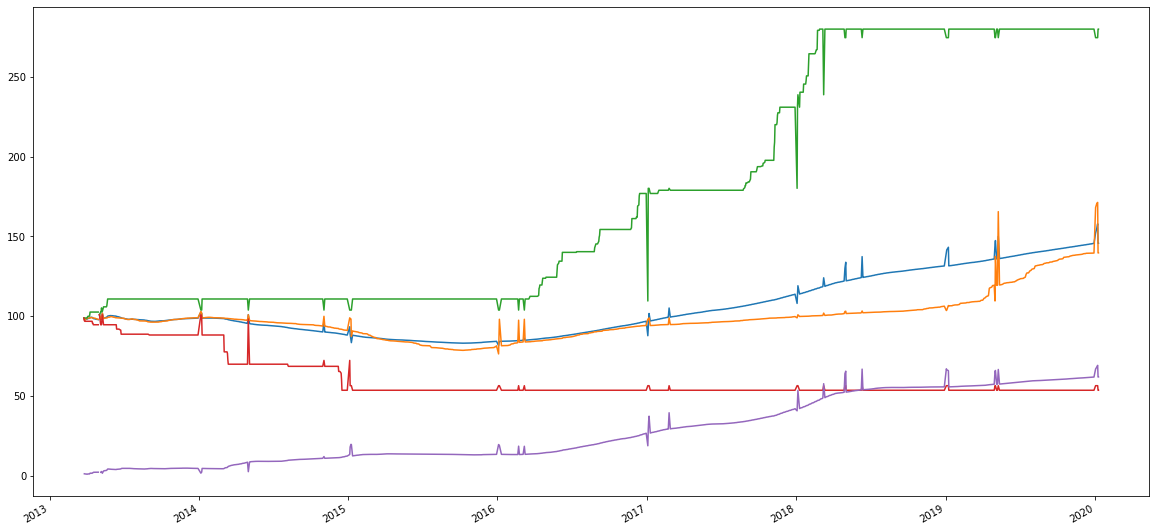

In [22]:
ac.groupby(['праздник'])['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10))
ac.groupby(['праздник'])['CLOSE'].transform(lambda x: x.expanding().median().shift(1)).plot(figsize=(20, 10))
ac.groupby(['праздник'])['CLOSE'].transform(lambda x: x.expanding().max().shift(1)).plot(figsize=(20, 10))
ac.groupby(['праздник'])['CLOSE'].transform(lambda x: x.expanding().min().shift(1)).plot(figsize=(20, 10))
ac.groupby(['праздник'])['CLOSE'].transform(lambda x: x.expanding().std().shift(1)).plot(figsize=(20, 10))


In [23]:
ac.groupby(['предпраздничный рабочий день']).expanding(min_periods=1)['CLOSE', 'Price(-1)', 'Price(-3)', 'Price(-5)'].agg([np.mean, np.median, np.max, np.min, np.std])


CLOSE                          \
                                               mean                           
                                              CLOSE   Price(-1)   Price(-3)   
предпраздничный рабочий день                                                  
0                            2013-03-25   98.790000         NaN         NaN   
                             2013-03-26   97.995000   98.790000         NaN   
                             2013-03-27   97.580000   97.995000         NaN   
                             2013-03-28   97.832500   97.580000   98.790000   
                             2013-03-29   98.018000   97.832500   97.995000   
...                                             ...         ...         ...   
1                            2019-02-22  143.860870  143.913043  142.667826   
                             2019-03-07  146.364583  146.458333  145.285833   
                             2019-04-30  149.516800  149.752000  148.586400   
                             2019-05-08  152.612308  152.895769  151.814615   
                             2019-06-11  155.696667  156.455185  155.261852   

                                                                        \
                                                      median             
                                          Price(-5)    CLOSE Price(-1)   
предпраздничный рабочий день                                             
0                            2013-03-25         NaN   98.790       NaN   
                             2013-03-26         NaN   97.995    98.790   
                             2013-03-27         NaN   97.200    97.995   
                             2013-03-28         NaN   97.895    97.200   
                             2013-03-29         NaN   98.590    97.895   
...                                             ...      ...       ...   
1                            2019-02-22  143.191304  105.810   105.140   
                             2019-03-07  145.883333  124.280   123.750   
                             2019-04-30  149.474800  142.750   142.360   
                             2019-05-08  152.386154  151.865   152.180   
                             2019-06-11  155.482963  160.980   162.000   

                                                                               \
                                                               amax             
                                        Price(-3) Price(-5)   CLOSE Price(-1)   
предпраздничный рабочий день                                                    
0                            2013-03-25       NaN       NaN   98.79       NaN   
                             2013-03-26       NaN       NaN   98.79     98.79   
                             2013-03-27       NaN       NaN   98.79     98.79   
                             2013-03-28    98.790       NaN   98.79     98.79   
                             2013-03-29    97.995       NaN   98.79     98.79   
...                                           ...       ...     ...       ...   
1                            2019-02-22   102.920     99.30  277.49    279.20   
                             2019-03-07   125.160    124.30  277.49    279.20   
                             2019-04-30   147.400    149.30  277.49    279.20   
                             2019-05-08   155.400    152.65  277.49    279.20   
                             2019-06-11   163.400    156.00  277.49    279.20   

                                         ... Price(-5)                   \
                                         ...      amax             amin   
                                         ... Price(-3) Price(-5)  CLOSE   
предпраздничный рабочий день             ...                              
0                            2013-03-25  ...       NaN       NaN  98.79   
                             2013-03-26  ...       NaN       NaN  97.20   
                             2013-03-27  ...       NaN       NaN  96.75   
        

In [24]:
ac.groupby(['выходной',	'праздник',	'предпраздничный рабочий день']).expanding(min_periods=1)['CLOSE', 'Price(-1)', 'Price(-3)', 'Price(-5)'].agg([np.mean, np.median, np.max, np.min, np.std])


CLOSE  \
                                                                 mean   
                                                                CLOSE   
выходной праздник предпраздничный рабочий день                          
0        0        0                            2013-03-25   98.790000   
                                               2013-03-26   97.995000   
                                               2013-03-27   97.580000   
                                               2013-03-28   97.832500   
                                               2013-03-29   98.018000   
...                                                               ...   
         1        0                            2019-05-03  149.948182   
                                               2019-05-10  152.214412   
                                               2020-01-03  155.151143   
                                               2020-01-06  157.894167   
                                               2020-01-08  160.630811   

                                                                       \
                                                                        
                                                            Price(-1)   
выходной праздник предпраздничный рабочий день                          
0        0        0                            2013-03-25         NaN   
                                               2013-03-26   98.790000   
                                               2013-03-27   97.995000   
                                               2013-03-28   97.580000   
                                               2013-03-29   97.832500   
...                                                               ...   
         1        0                            2019-05-03  149.076061   
                                               2019-05-10  151.456176   
                                               2020-01-03  154.407429   
                                               2020-01-06  157.201667   
                                               2020-01-08  159.815135   

                                                                       \
                                                                        
                                                            Price(-3)   
выходной праздник предпраздничный рабочий день                          
0        0        0                            2013-03-25         NaN   
                                               2013-03-26         NaN   
                                               2013-03-27         NaN   
                                               2013-03-28   98.790000   
                                               2013-03-29   97.995000   
...                                                               ...   
         1        0                            2019-05-03  147.338788   
                                               2019-05-10  149.852353   
                                               2020-01-03  152.663429   
                                               2020-01-06  155.424444   
                                               2020-01-08  158.108919   

                                                                       \
                                                                        
                                                            Price(-5)   
выходной праздник предпраздничный рабочий день                          
0        0        0                            2013-03-25         NaN   
                                               2013-03-26         NaN   
                                               2013-03-27         NaN   
                                               2013-03-28         NaN   
                                               2013-03-29         NaN   
...                                                               ...   
         1        0                           